In [1]:
import pandas as pd

df = pd.read_csv('zecon/State_time_series.csv')
df.head()

,Date,RegionName,DaysOnZillow_AllHomes,InventorySeasonallyAdjusted_AllHomes,InventoryRaw_AllHomes,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore,...,ZHVI_BottomTier,ZHVI_CondoCoop,ZHVI_MiddleTier,ZHVI_SingleFamilyResidence,ZHVI_TopTier,ZRI_AllHomes,ZRI_AllHomesPlusMultifamily,ZriPerSqft_AllHomes,Zri_MultiFamilyResidenceRental,Zri_SingleFamilyResidenceRental
0,1996-04-30,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,45600.0,99500.0,79500.0,79000.0,140200.0,NaN,NaN,NaN,NaN,NaN
1,1996-04-30,Arizona,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,67100.0,78900.0,103600.0,107500.0,168700.0,NaN,NaN,NaN,NaN,NaN
2,1996-04-30,Arkansas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,38400.0,70300.0,64400.0,64500.0,115200.0,NaN,NaN,NaN,NaN,NaN
3,1996-04-30,California,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,95100.0,136100.0,157900.0,162000.0,270600.0,NaN,NaN,NaN,NaN,NaN
4,1996-04-30,Colorado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,82700.0,99400.0,128100.0,133600.0,209300.0,NaN,NaN,NaN,NaN,NaN


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13096 entries, 0 to 13095
Data columns (total 79 columns):
Date                                                             13096 non-null object
RegionName                                                       13096 non-null object
DaysOnZillow_AllHomes                                            4794 non-null float64
InventorySeasonallyAdjusted_AllHomes                             4845 non-null float64
InventoryRaw_AllHomes                                            4845 non-null float64
MedianListingPricePerSqft_1Bedroom                               3554 non-null float64
MedianListingPricePerSqft_2Bedroom                               4484 non-null float64
MedianListingPricePerSqft_3Bedroom                               4557 non-null float64
MedianListingPricePerSqft_4Bedroom                               4627 non-null float64
MedianListingPricePerSqft_5BedroomOrMore                         4519 non-null float64
MedianListingPricePer

In [4]:
df2 = df[['Date', 'RegionName' 'ZHVI_1bedroom', 'ZHVI_2bedroom','ZHVI_3bedroom', 'ZHVI_4bedroom']]
df2.describe()

,ZHVI_1bedroom,ZHVI_2bedroom,ZHVI_3bedroom,ZHVI_4bedroom
count,10562.000000,11698.000000,12736.000000,12310.000000
mean,116903.825033,134984.740981,166830.967337,243516.246954
std,60914.610422,72089.609184,79993.598373,105974.024209
min,30900.000000,32800.000000,49600.000000,64700.000000
25%,74500.000000,86625.000000,116375.000000,174800.000000
50%,100400.000000,115300.000000,141100.000000,217800.000000
75%,142300.000000,166600.000000,203900.000000,280575.000000
max,390900.000000,543500.000000,632100.000000,852300.000000


In [3]:
df2.Date = pd.to_datetime(df2.Date)

C:\Users\rgraj\Anaconda3\lib\site-packages\pandas\core\generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [5]:
df2.set_index('Date', inplace=True)

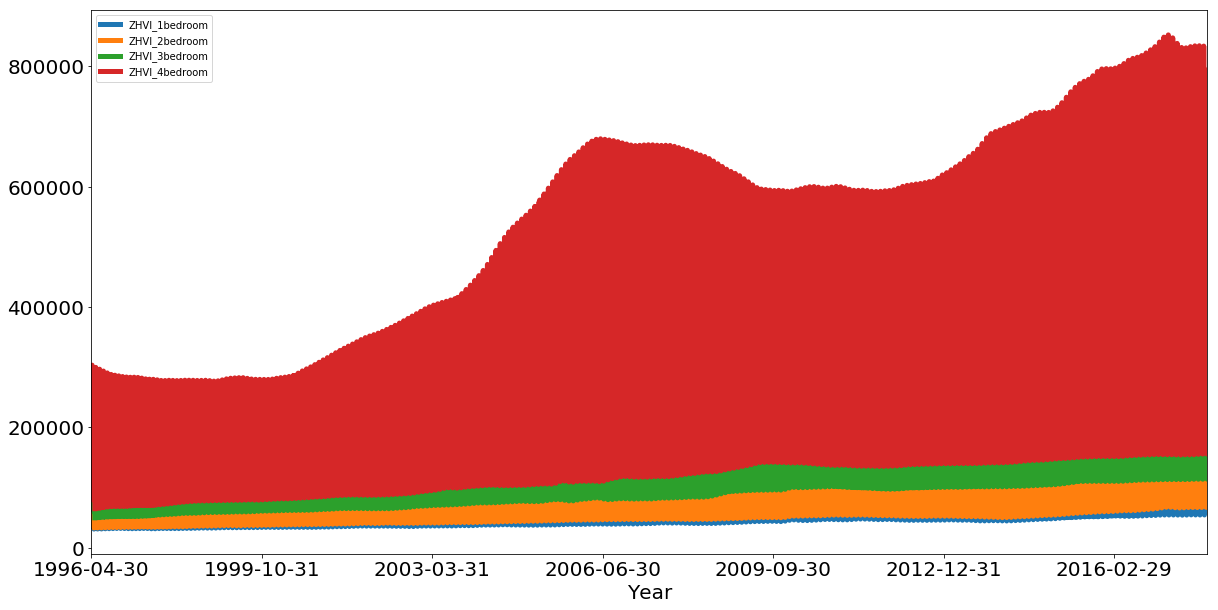

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
df2.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

In [2]:
df3 = df[['Date', 'RegionName', 'ZHVI_4bedroom']]


In [3]:
df3.set_Index('Date',inplace=True)

AttributeError: 'DataFrame' object has no attribute 'set_Index'

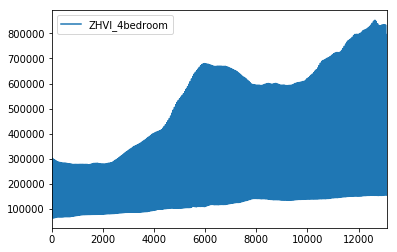

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
df[['Date', 'ZHVI_4bedroom']].plot(by='RegionName')
plt.show()

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
df.groupby(['Date','RegionName'])['ZHVI_1bedroom'].sum()
#plt.show()

In [19]:
df.value_counts()

AttributeError: 'DataFrame' object has no attribute 'value_counts'

In [2]:
df.set_index('Date', inplace=True)

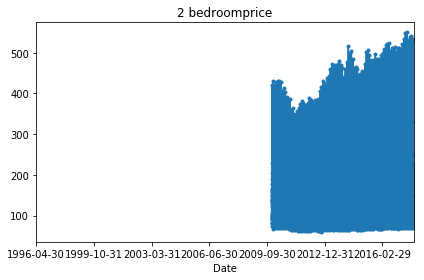

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
df.MedianListingPricePerSqft_2Bedroom.plot(title='2 bedroomprice',marker=".")
plt.tight_layout()
plt.show()

In [11]:
df.asfreq('M').head()

ValueError: cannot reindex from a duplicate axis

In [16]:
bedroom1 = df.pivot(index='Date', columns='RegionName', values='MedianListingPricePerSqft_AllHomes')
bedroom1.head()

RegionName,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,DistrictofColumbia,Florida,...,Tennessee,Texas,UnitedStates,Utah,Vermont,Virginia,Washington,WestVirginia,Wisconsin,Wyoming
Date,,,,,,,,,,,,,,,,,,,,,
1996-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


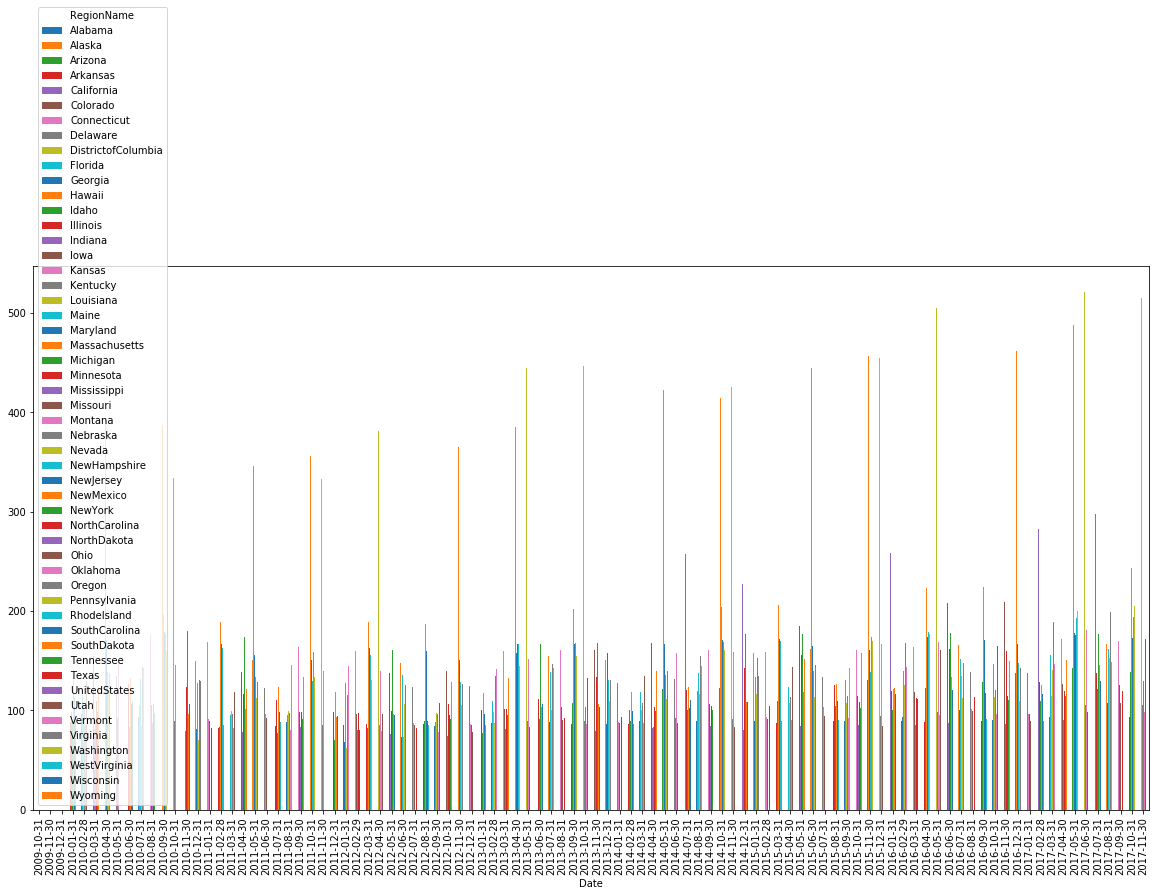

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
bedroom1[bedroom1.index >='2009-1-1'].plot(kind='bar', figsize=(20,10))
plt.show()

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
from pandas.plotting import andrews_curves
plt.figure()
andrews_curves(bedroom1, 'RegionName')

KeyError: 'RegionName'

In [8]:
df2 = df.groupby('RegionName')['MedianListingPricePerSqft_AllHomes', 'MedianListingPricePerSqft_2Bedroom', 'MedianListingPricePerSqft_3Bedroom', 'MedianListingPricePerSqft_4Bedroom'].mean().dropna().sort_values(by='MedianListingPricePerSqft_AllHomes', ascending=False)
df2.head(7)


,MedianListingPricePerSqft_AllHomes,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom
RegionName,,,,
DistrictofColumbia,419.093624,482.847351,379.115114,407.812273
Hawaii,410.104882,434.841398,373.677818,374.491758
California,267.298446,284.517438,249.055209,246.117295
Massachusetts,205.758438,205.965237,196.002100,197.815362
NewYork,172.085814,164.884029,124.494557,132.594197
RhodeIsland,171.417274,166.973670,169.183694,155.791799
Colorado,171.243077,179.445588,160.793135,167.689936


In [39]:
df2.tail(5)

,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom
RegionName,,,,
Kentucky,85.749468,85.508889,91.040568,95.414847
Ohio,79.982804,75.479149,83.604556,90.950638
Indiana,76.377055,72.410820,81.728720,86.443793
Oklahoma,76.305139,66.561026,86.766307,98.723620
Kansas,67.365200,70.059507,90.721067,110.666997


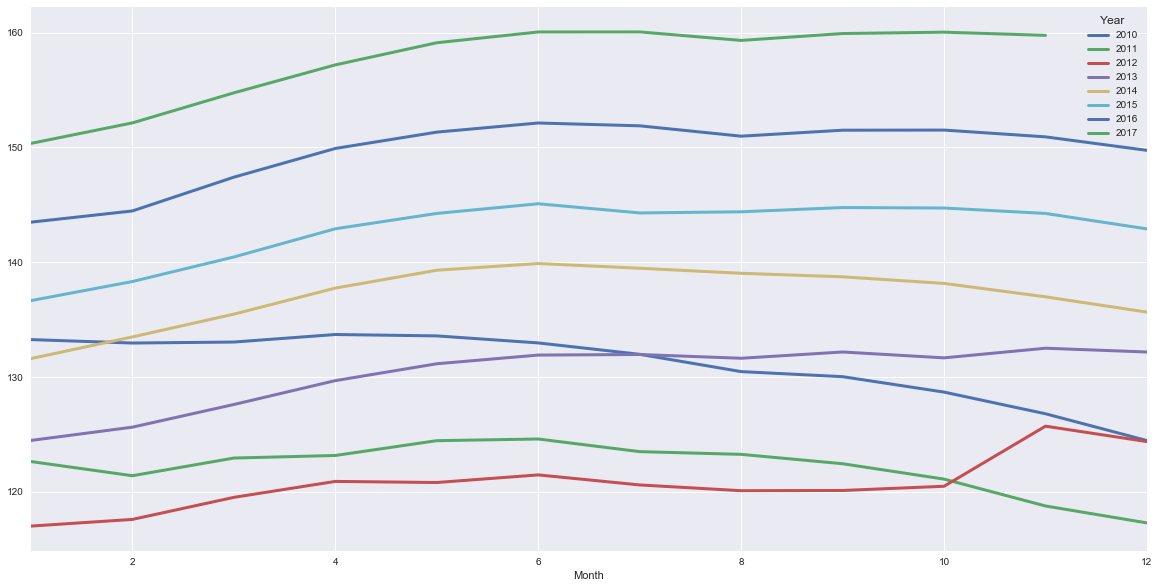

In [4]:
df3 = df
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()
df3['Date'] = pd.to_datetime(df['Date'])
df3['Year'] = df['Date'].dt.year
df3['Month'] = df['Date'].dt.month
df4 = pd.pivot_table(df, index='Month', columns = 'Year', values = 'MedianListingPricePerSqft_AllHomes', aggfunc=np.mean)
df4.plot(figsize=(20,10), linewidth=3)
plt.show()

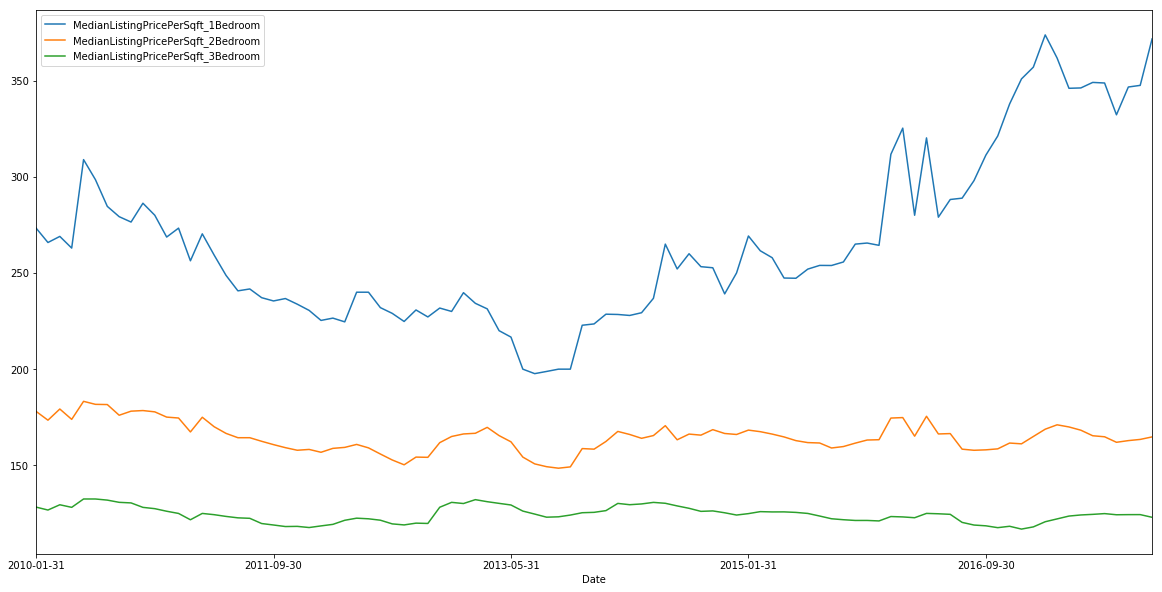

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
df5= df[df['RegionName']=="NewYork"][['Date','MedianListingPricePerSqft_1Bedroom', 'MedianListingPricePerSqft_2Bedroom', 'MedianListingPricePerSqft_3Bedroom']].dropna()
df5.set_index('Date', inplace=True)
df5.plot(figsize=(20,10))
plt.show()

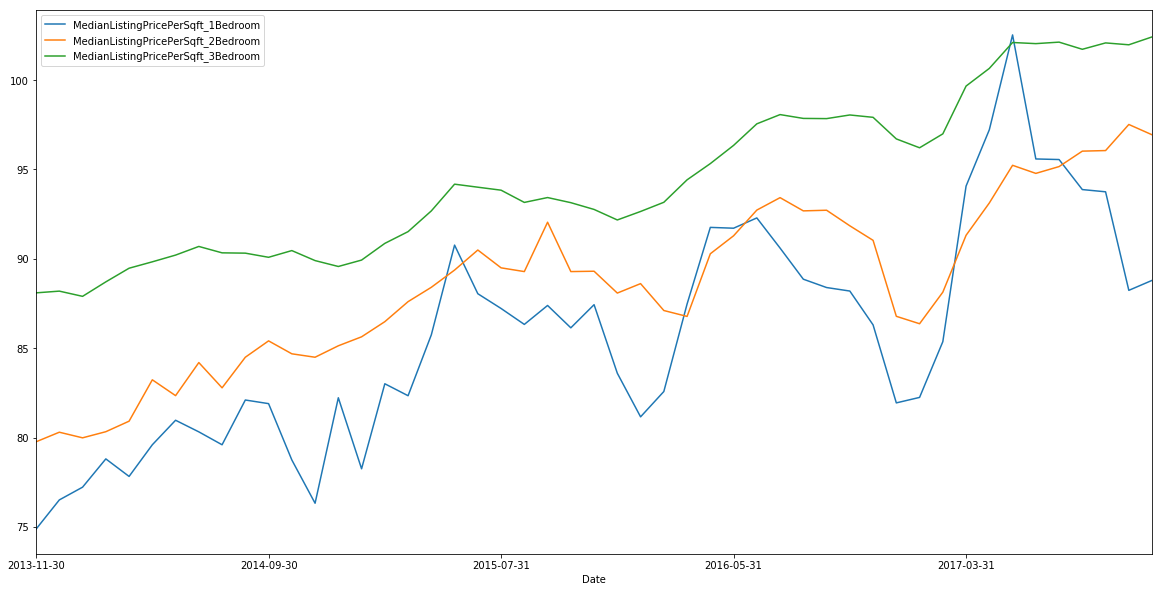

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
df5= df[df['RegionName']=="Kentucky"][['Date','MedianListingPricePerSqft_1Bedroom', 'MedianListingPricePerSqft_2Bedroom', 'MedianListingPricePerSqft_3Bedroom']].dropna()
df5.set_index('Date', inplace=True)
df5.plot(figsize=(20,10))
plt.show()

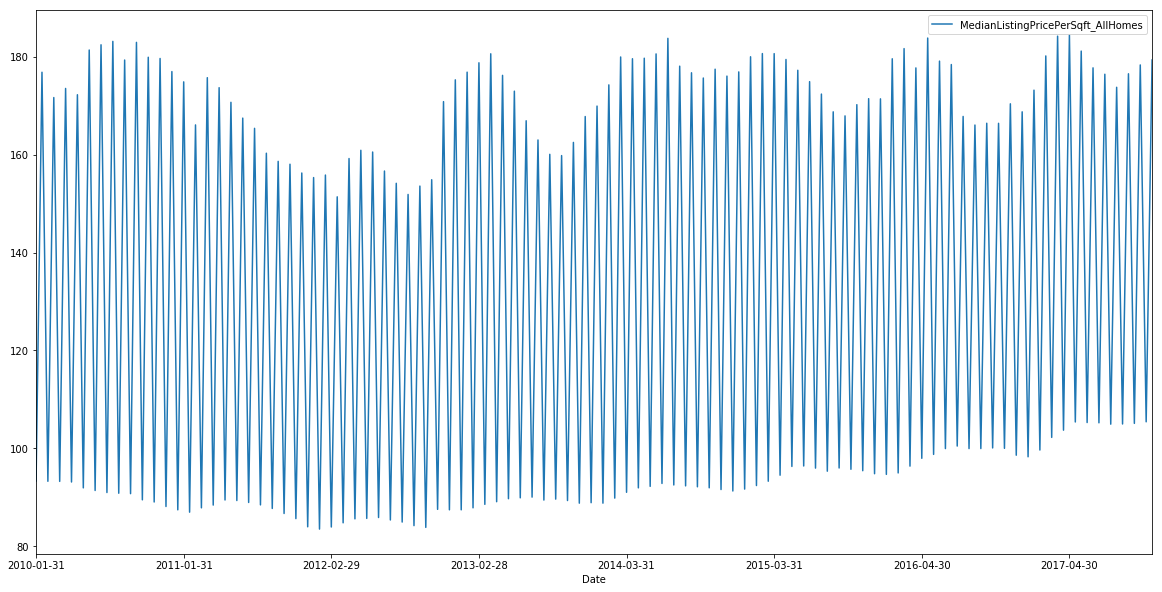

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
df5= df[(df['RegionName']=="Kentucky") | (df['RegionName']=="NewYork") ][['Date','RegionName','MedianListingPricePerSqft_AllHomes']].dropna()
df5.set_index('Date', inplace=True)
df5.plot(figsize=(20,10))
plt.show()

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
df6= pd.DataFrame(df[(df['RegionName']=="Kentucky") | (df['RegionName']=="NewYork") ][['Date','RegionName','MedianListingPricePerSqft_AllHomes']].\
    dropna().\
    groupby(['Date','RegionName'])['RegionName','MedianListingPricePerSqft_AllHomes'].mean())
#df6.set_index('Date', inplace=True)
#df6.plot(figsize=(20,10))
#plt.show()
df6.head()

MedianListingPricePerSqft_AllHomes
Date       RegionName                                    
2010-01-31 Kentucky                             93.316018
           NewYork                             176.836458
2010-02-28 Kentucky                             93.266667
           NewYork                             171.666667
2010-03-31 Kentucky                             93.246269

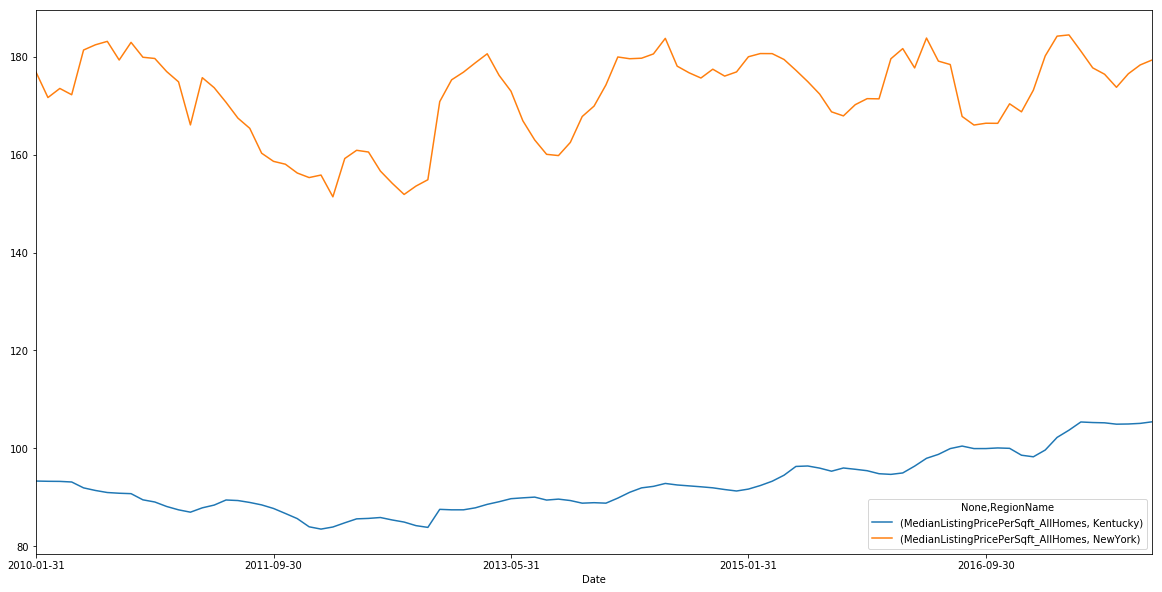

In [56]:
%matplotlib inline
import matplotlib.pyplot as plt
df6= pd.DataFrame(df[(df['RegionName']=="Kentucky") | (df['RegionName']=="NewYork") ][['Date','RegionName','MedianListingPricePerSqft_AllHomes']].\
    dropna().\
    groupby(['Date', 'RegionName'])['RegionName','MedianListingPricePerSqft_AllHomes'].mean())
df6=df6.unstack(level=1)
#df6.set_index('Date', inplace=True)
df6.plot(figsize=(20,10))
plt.show()
#df6.head()

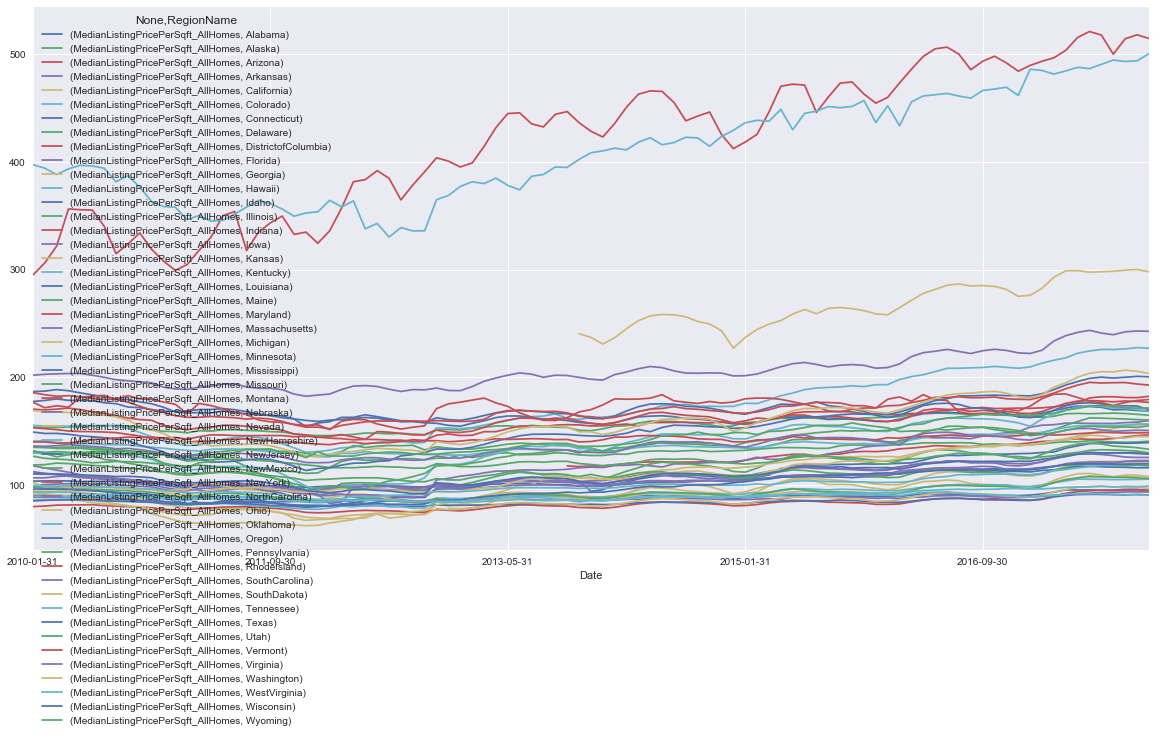

In [58]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
df6= pd.DataFrame(df[['Date','RegionName','MedianListingPricePerSqft_AllHomes']].\
    dropna().\
    groupby(['Date', 'RegionName'])['RegionName','MedianListingPricePerSqft_AllHomes'].mean())
df6=df6.unstack(level=1)
#df6.set_index('Date', inplace=True)
df6.plot(figsize=(20,10))
plt.show()
#df6.head()

In [61]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates

sns.set()
df6= pd.DataFrame(df[['Date','RegionName','MedianListingPricePerSqft_AllHomes']].\
    dropna().\
    groupby(['Date', 'RegionName'])['RegionName','MedianListingPricePerSqft_AllHomes'].mean())
df6=df6.unstack(level=1)
#df6.set_index('Date', inplace=True)
#df6.plot(figsize=(20,10))
parallel_coordinates(df6, 'RegionName')
plt.show()
#df6.head()

TypeError: parallel_coordinates() missing 1 required positional argument: 'class_column'

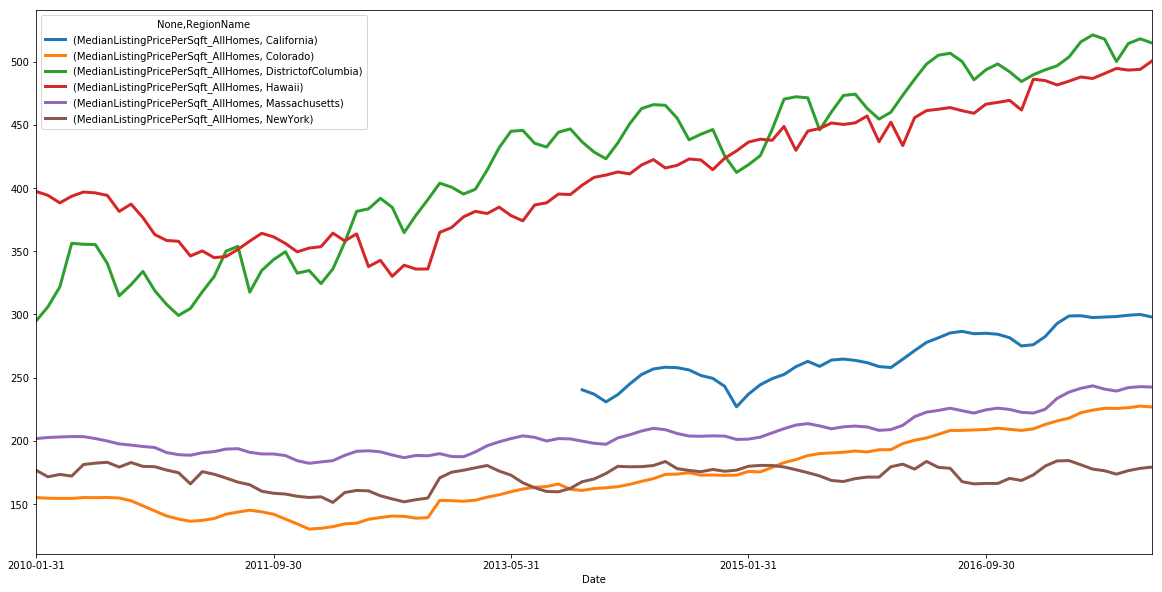

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
statelist = ['Hawaii', 'DistrictofColumbia', 'California', 'Massachusetts', 'NewYork', 'Colorado']
df6= pd.DataFrame(df[(df['RegionName'].isin(statelist))][['Date','RegionName','MedianListingPricePerSqft_AllHomes']].\
    dropna().\
    groupby(['Date', 'RegionName'])['RegionName','MedianListingPricePerSqft_AllHomes'].mean())
df6=df6.unstack(level=1)
#df6.set_index('Date', inplace=True)
df6.plot(figsize=(20,10), linewidth=3)
plt.show()

In [67]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
statelist = ['Hawaii', 'DistrictofColumbia', 'California', 'Massachusetts', 'NewYork']
df6= pd.DataFrame(df[(df['RegionName'].isin(statelist))][['Date','RegionName','MedianListingPricePerSqft_AllHomes']].\
    dropna().\
    groupby(['Date', 'RegionName'])['RegionName','MedianListingPricePerSqft_AllHomes'].mean())
df6=df6.unstack(level=1)
ax.format_xdata = mdates.DateFormatter('%Y-%m')
#df6.set_index('Date', inplace=True)
df6.plot(figsize=(20,10), linewidth=3)
plt.show()

NameError: name 'ax' is not defined

In [2]:
df8 = df[['Date', 'MedianListingPricePerSqft_1Bedroom', 'MedianListingPricePerSqft_2Bedroom', 'MedianListingPricePerSqft_3Bedroom']].dropna()
df8.set_index('Date', inplace=True)
df8.corr()

,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom
MedianListingPricePerSqft_1Bedroom,1.000000,0.952066,0.917980
MedianListingPricePerSqft_2Bedroom,0.952066,1.000000,0.984083
MedianListingPricePerSqft_3Bedroom,0.917980,0.984083,1.000000


In [28]:
df8.diff().corr()

,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom
MedianListingPricePerSqft_1Bedroom,1.000000,0.952669,0.921441
MedianListingPricePerSqft_2Bedroom,0.952669,1.000000,0.984852
MedianListingPricePerSqft_3Bedroom,0.921441,0.984852,1.000000


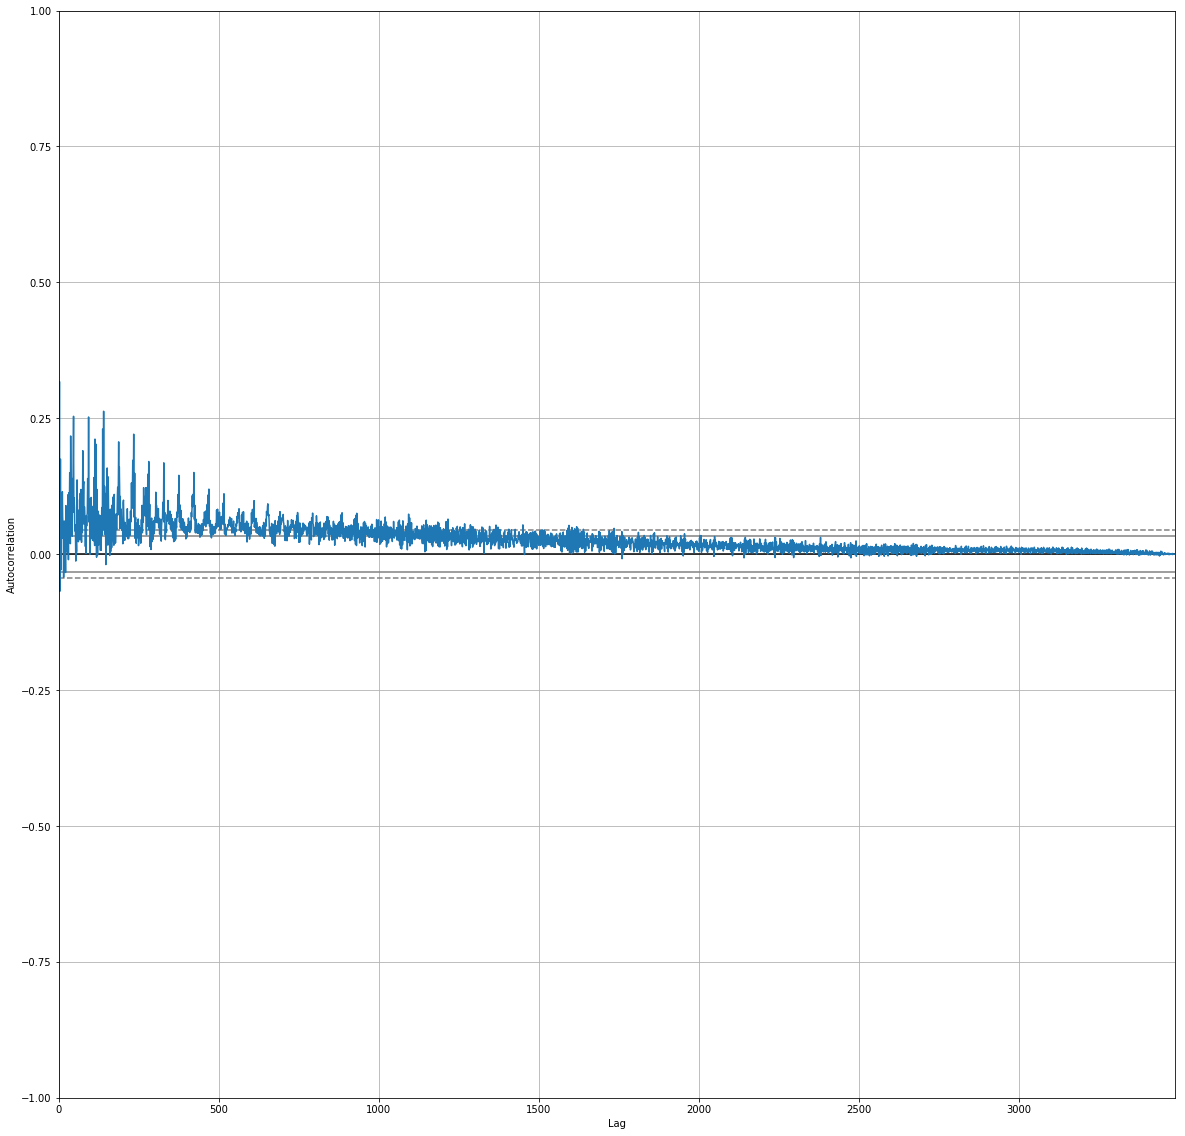

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
pd.plotting.autocorrelation_plot(df8);

In [25]:
from pandas.compat import lmap
import numpy as np

def autocorrelation_plot(series, n_samples=None, ax=None, **kwds):
    """Autocorrelation plot for time series.

    Parameters:
    -----------
    series: Time series
    ax: Matplotlib axis object, optional
    kwds : keywords
        Options to pass to matplotlib plotting method

    Returns:
    -----------
    ax: Matplotlib axis object
    """
    import matplotlib.pyplot as plt
    n = len(series)
    data = np.asarray(series)
    if ax is None:
        ax = plt.gca(xlim=(1, n_samples), ylim=(-1.0, 1.0))
    mean = np.mean(data)
    c0 = np.sum((data - mean) ** 2) / float(n)

    def r(h):
        return ((data[:n - h] - mean) *
                (data[h:] - mean)).sum() / float(n) / c0
    x = (np.arange(n) + 1).astype(int)
    y = lmap(r, x)
    z95 = 1.959963984540054
    z99 = 2.5758293035489004
    ax.axhline(y=z99 / np.sqrt(n), linestyle='--', color='grey')
    ax.axhline(y=z95 / np.sqrt(n), color='grey')
    ax.axhline(y=0.0, color='black')
    ax.axhline(y=-z95 / np.sqrt(n), color='grey')
    ax.axhline(y=-z99 / np.sqrt(n), linestyle='--', color='grey')
    ax.set_xlabel("Lag")
    ax.set_ylabel("Autocorrelation")
    if n_samples:
        ax.plot(x[:n_samples], y[:n_samples], **kwds)
    else:
        ax.plot(x, y, **kwds)
    if 'label' in kwds:
        ax.legend()
    ax.grid()
    return ax

#%matplotlib inline
#import matplotlib.pyplot as plt
#plt.figure(figsize=(20,10))
#autocorrelation_plot(df8,2000);

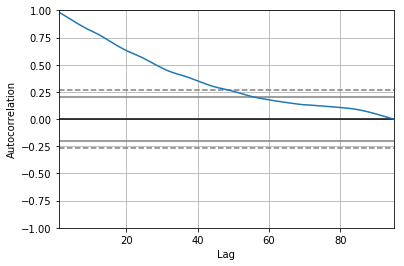

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
#df9 = df[['Date','MedianListingPricePerSqft_1Bedroom', 'MedianListingPricePerSqft_2Bedroom']].dropna()
df.Date = pd.to_datetime(df.Date)
df9=df[df['Date'] >='01-01-2010'][['Date','RegionName','MedianListingPricePerSqft_1Bedroom', 'MedianListingPricePerSqft_2Bedroom', 'MedianListingPricePerSqft_3Bedroom','MedianListingPricePerSqft_4Bedroom']]
df10=df9.groupby('Date')['Date','RegionName','MedianListingPricePerSqft_1Bedroom', 'MedianListingPricePerSqft_2Bedroom','MedianListingPricePerSqft_3Bedroom','MedianListingPricePerSqft_4Bedroom'].mean().dropna()
#df10.set_index('Date', inplace=True)
#df10.head()
#plot_acf(df9)
pd.plotting.autocorrelation_plot(df10);
plt.show()

In [19]:
df10.diff().corr()

,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom
MedianListingPricePerSqft_1Bedroom,1.000000,0.648134,0.688513,0.634148
MedianListingPricePerSqft_2Bedroom,0.648134,1.000000,0.936531,0.914260
MedianListingPricePerSqft_3Bedroom,0.688513,0.936531,1.000000,0.951192
MedianListingPricePerSqft_4Bedroom,0.634148,0.914260,0.951192,1.000000


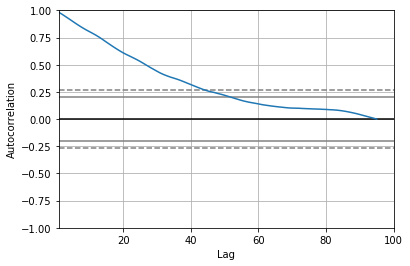

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
#df9 = df[['Date','MedianListingPricePerSqft_1Bedroom', 'MedianListingPricePerSqft_2Bedroom']].dropna()
df.Date = pd.to_datetime(df.Date)
df11=df[df['Date'] >='01-01-2010'][['Date','RegionName','MedianListingPricePerSqft_1Bedroom', 'MedianListingPricePerSqft_2Bedroom', 'MedianListingPricePerSqft_3Bedroom','MedianListingPricePerSqft_4Bedroom', 'MedianListingPricePerSqft_5BedroomOrMore']]
df12=df11.groupby('Date')['Date','MedianListingPricePerSqft_1Bedroom', 'MedianListingPricePerSqft_2Bedroom','MedianListingPricePerSqft_3Bedroom','MedianListingPricePerSqft_4Bedroom','MedianListingPricePerSqft_5BedroomOrMore'].mean().dropna()
#df10.set_index('Date', inplace=True)
#df10.head()
#plot_acf(df9)
#pd.plotting.autocorrelation_plot(df12);
autocorrelation_plot(df12, 100)
plt.show()

C:\Users\rgraj\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


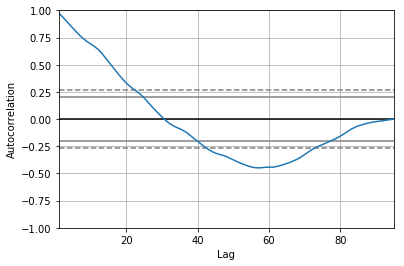

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
#df9 = df[['Date','MedianListingPricePerSqft_1Bedroom', 'MedianListingPricePerSqft_2Bedroom']].dropna()
df.Date = pd.to_datetime(df.Date)
df13=df[df['Date'] >='01-01-2010'][['Date','RegionName','MedianListingPricePerSqft_AllHomes']]
df14=df13.groupby('Date')['Date','MedianListingPricePerSqft_AllHomes'].mean().dropna()
#df10.set_index('Date', inplace=True)
#df10.head()
#plot_acf(df9)
pd.plotting.autocorrelation_plot(df14);
#autocorrelation_plot(df14, 100)
plt.show()

                                       ARIMA Model Results                                       
Dep. Variable:     D2.MedianListingPricePerSqft_AllHomes   No. Observations:                   93
Model:                                   ARIMA(15, 2, 0)   Log Likelihood                -125.793
Method:                                          css-mle   S.D. of innovations              0.909
Date:                                   Sun, 04 Feb 2018   AIC                            285.585
Time:                                           17:52:23   BIC                            328.639
Sample:                                       03-31-2010   HQIC                           302.969
                                            - 11-30-2017                                         
                                                   coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

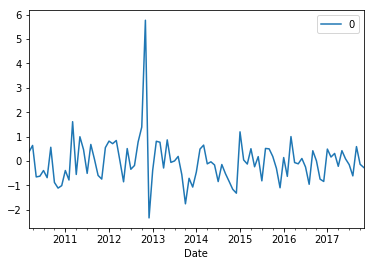

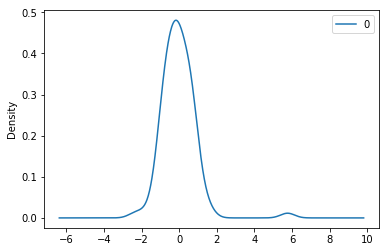

AttributeError: 'ARIMAResults' object has no attribute 'plot_diagnostics'

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from pandas import DataFrame

model = ARIMA(df14, order=(15,2,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()

residuals.plot(kind='kde')
plt.show()
residuals.describe()

model_fit.plot_diagnostics(figsize=(15,12))
plt.show()

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from pandas import DataFrame
X = df14

train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
history = [x for x in train]
print(train.head())
arima_order = (15, 1, 0)
model = ARIMA(history, order=arima_order)
model_fit = model.fit(disp=0)
yhat = model_fit.forecast()[0]
#print(model_fit.summary())
print(yhat)

residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()

residuals.plot(kind='kde')
plt.show()
residuals.describe()

            MedianListingPricePerSqft_AllHomes
Date                                          
2010-01-31                          133.266225
2010-02-28                          132.966368
2010-03-31                          133.052193
2010-04-30                          133.708705
2010-05-31                          133.588392


ValueError: Insufficient degrees of freedom to estimate

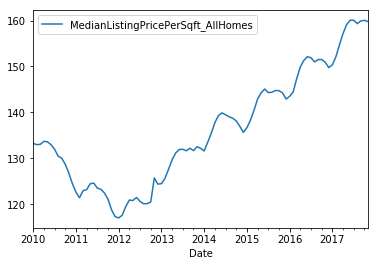

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
df14.plot()
plt.show()

In [47]:
def evaluate_arima_model(X, arima_order):
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    predictions = list()
    print(history)
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
        break
    error = mean_squared_error(test, predictions)
    return error

In [48]:
order = (15, 1, 0)
mse = evaluate_arima_model(df14, order)

['MedianListingPricePerSqft_AllHomes']


ValueError: Insufficient degrees of freedom to estimate

In [49]:
import warnings
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
 
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	train_size = int(len(X) * 0.66)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit(disp=0)
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	error = mean_squared_error(test, predictions)
	return error
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					mse = evaluate_arima_model(dataset, order)
					if mse < best_score:
						best_score, best_cfg = mse, order
					print('ARIMA%s MSE=%.3f' % (order,mse))
				except:
					continue
	print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

In [50]:
p_values = [8, 15]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
series=df14
evaluate_models(series.values, p_values, d_values, q_values)

ARIMA(8, 1, 0) MSE=0.804
ARIMA(8, 2, 0) MSE=0.975
ARIMA(15, 0, 0) MSE=0.594
ARIMA(15, 0, 1) MSE=0.598
ARIMA(15, 1, 0) MSE=0.360
ARIMA(15, 1, 1) MSE=0.367
ARIMA(15, 1, 2) MSE=0.390
ARIMA(15, 2, 0) MSE=0.324
Best ARIMA(15, 2, 0) MSE=0.324


In [57]:
import statsmodels
statsmodels.__version__

'0.8.0'

C:\Users\rgraj\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\rgraj\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\rgraj\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\rgraj\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\rgraj\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check

Test RMSE: 0.569


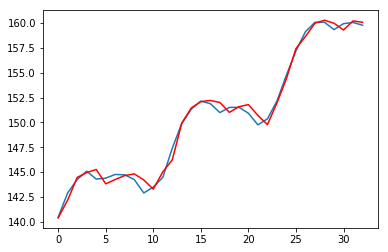

159.824124926
160.496615088
162.368488401
164.690637782
167.156354642
169.053416451
169.992050043
170.328109381
170.395046687
170.693905824
171.157603859
171.454838878


In [5]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset

series = df14
# split into train and test sets
X = series.values
train_size = int(len(X) * 0.66)
train, test = X[0:train_size], X[train_size:]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	# fit model
	model = ARIMA(history, order=(15,2,0))
	model_fit = model.fit()
	# one step forecast
	yhat = model_fit.forecast()[0]
	# store forecast and ob
	predictions.append(yhat)
	history.append(test[t])
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

forecast = list()
model = ARIMA(history, order=(15,2,0))
model_fit = model.fit(disp=0)
forecast = model_fit.forecast(steps=12)[0]
for yhat in forecast:
    print(yhat)

In [62]:
%matplotlib inline
import matplotlib.pyplot as plt
history.plot()
plt.show()

AttributeError: 'list' object has no attribute 'plot'

In [61]:
history

[array([ 133.26622475]),
 array([ 132.96636767]),
 array([ 133.05219336]),
 array([ 133.70870495]),
 array([ 133.58839204]),
 array([ 132.97672421]),
 array([ 131.98509218]),
 array([ 130.47737072]),
 array([ 130.0361441]),
 array([ 128.69237462]),
 array([ 126.80426194]),
 array([ 124.4705371]),
 array([ 122.64230077]),
 array([ 121.40762673]),
 array([ 122.94695628]),
 array([ 123.17092904]),
 array([ 124.46109886]),
 array([ 124.6060149]),
 array([ 123.5055726]),
 array([ 123.26881913]),
 array([ 122.4520728]),
 array([ 121.1124219]),
 array([ 118.77227456]),
 array([ 117.29664999]),
 array([ 117.0196642]),
 array([ 117.60215646]),
 array([ 119.52231632]),
 array([ 120.91176192]),
 array([ 120.81613972]),
 array([ 121.47841977]),
 array([ 120.60463073]),
 array([ 120.10359801]),
 array([ 120.12297172]),
 array([ 120.48884153]),
 array([ 125.72344761]),
 array([ 124.38126422]),
 array([ 124.48088985]),
 array([ 125.63869506]),
 array([ 127.61200718]),
 array([ 129.6923042]),
 array([